# Gravitational Waves Data Preprocessing 


<font size = 3> - In this data preprocessing file for gravitational wave detection, we first apply a whitening filter to remove noise from the raw signal. We then transform the signal into a spectrogram representation, which provides a visual representation of the signal's frequency content over time. The main implementation of this process was done with the help of the [GWpy](https://gwpy.github.io/) library. We also plot our date to acheivev more understanding! 

In [2]:
#Requiered libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from gwpy.timeseries import TimeSeries, TimeSeriesDict
from gwpy.plot import Plot
from glob import glob

- ## Helper Functions

In [3]:
#Function Purpose to Load npy Data given a path
def loadNpyData(path):
    data = np.load(path) 
    return data

In [4]:
#Function Purpose to Load CSV Data given a path
def loadCSVData(path):
    data = pd.read_csv(path)
    return data

In [5]:
#Function Purpose to return a labeled Data Frame of the Gravitational waves Time Series Data Frame
def createTSDataFrame(sample_data):
    labels = ['LIGO Hanford', 'LIGO Livingston', 'Virgo' ]
    df = pd.DataFrame(sample_data)
    df.index = labels
    return df 

In [6]:
#Function Purpose to return each time series object represented in the npy array, give Time Series Data
def read_ts_file(Time_Series_Data): 
    ts1 = TimeSeries(Time_Series_Data[0,:], sample_rate =2048)
    ts2 = TimeSeries(Time_Series_Data[1,:],sample_rate =2048)
    ts3 = TimeSeries(Time_Series_Data[2,:],sample_rate =2048)
    return  ts1, ts2, ts3

In [7]:
#Function to plot all 3 Time series individually
def plot_data(ts1, ts2, ts3):
    plot = Plot(ts1, ts2, ts3, separate=True, sharex=True, figsize=[17, 12])
    ax = plt.gca()   
    ax.set_xlim(0,2)  
    plot.axes[0].set_xlabel('Time [s]')
    plot.axes[0].set_ylabel('GW Amplitude [Strain]')
    plot.axes[1].set_xlabel('Time [s]')
    plot.axes[1].set_ylabel('GW Amplitude [Strain]')
    plot.axes[2].set_xlabel('Time [s]')
    plot.axes[2].set_ylabel('GW Amplitude [Strain]')
    plot.show()

In [8]:
#Ploting all time series in one plot
def plot_data_jointly(ts1, ts2, ts3):  
    plot = Plot(figsize=(15, 9))
    ax = plot.add_subplot(xscale='auto-gps')
    ax.plot(ts1, color='gwpy:ligo-hanford', label='LIGO-Hanford')
    ax.plot(ts2, color='gwpy:ligo-livingston', label='LIGO-Livingston')
    ax.plot(ts3, color='gwpy:virgo', label='Virgo')
    ax.set_xlim(0, 2)
    ax.set_ylabel('Gravitational Waves Amplitude')
    ax.set_xlabel('Time [s]')
    ax.set_title("Joint Plot of Time Series")
    ax.legend()
    plot.show()

- ## Loading Sample Data

In [9]:
#Loading sample data from given path
traing_path =glob("../data/train/*/*/*/*")
path1_signal = traing_path[100] #Signal
path_no_signal = traing_path[105] #No Signal

#Loading 2D Npy Arrays and storing into variable
sample_data_signal = loadNpyData(path1_signal)
sample_no_signal = loadNpyData(path_no_signal)

In [10]:
#Storing each timeseries (from each device), for both timeseries with a signal and no signal
ts_signal1,  ts_signal2,  ts_signal3 = read_ts_file(sample_data_signal)
ts_no_signal1,  ts_no_signal2,  ts_no_signal3 = read_ts_file(sample_no_signal)

/Users/Robin1/opt/anaconda3/envs/COMP_542/lib/python3.9/site-packages/gwpy/plot/plot.py:287: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


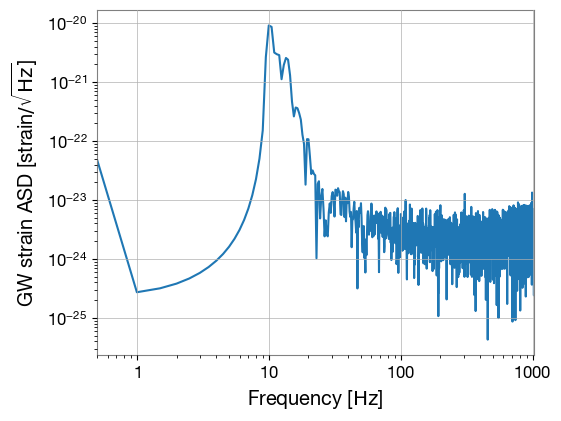

In [11]:
#FFT and plot of data after Calculatin=g the FFT
spectrum = ts_signal1.asd(2)
plot = spectrum.plot()
ax = plot.gca()
ax.set_xlim()
ax.set_ylabel(r'GW strain ASD [strain$/\sqrt{\mathrm{Hz}}$]')
plot.show()


- ##  Ploting Time Series Sample Data

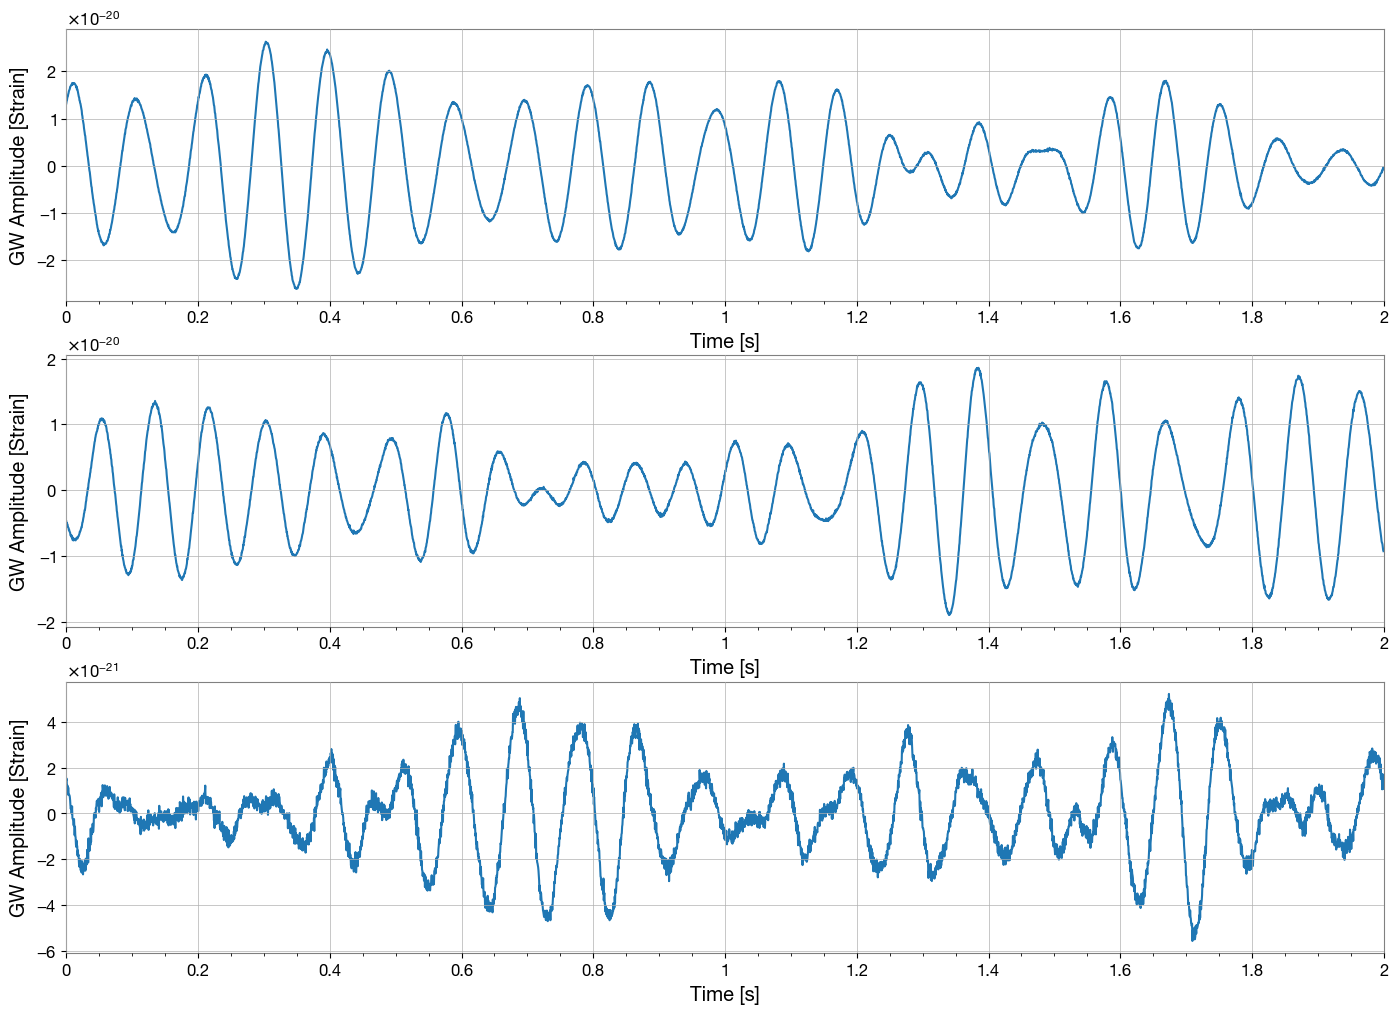

In [12]:
#ploting time Series with signal
plot_data(ts_signal1,  ts_signal2,  ts_signal3)

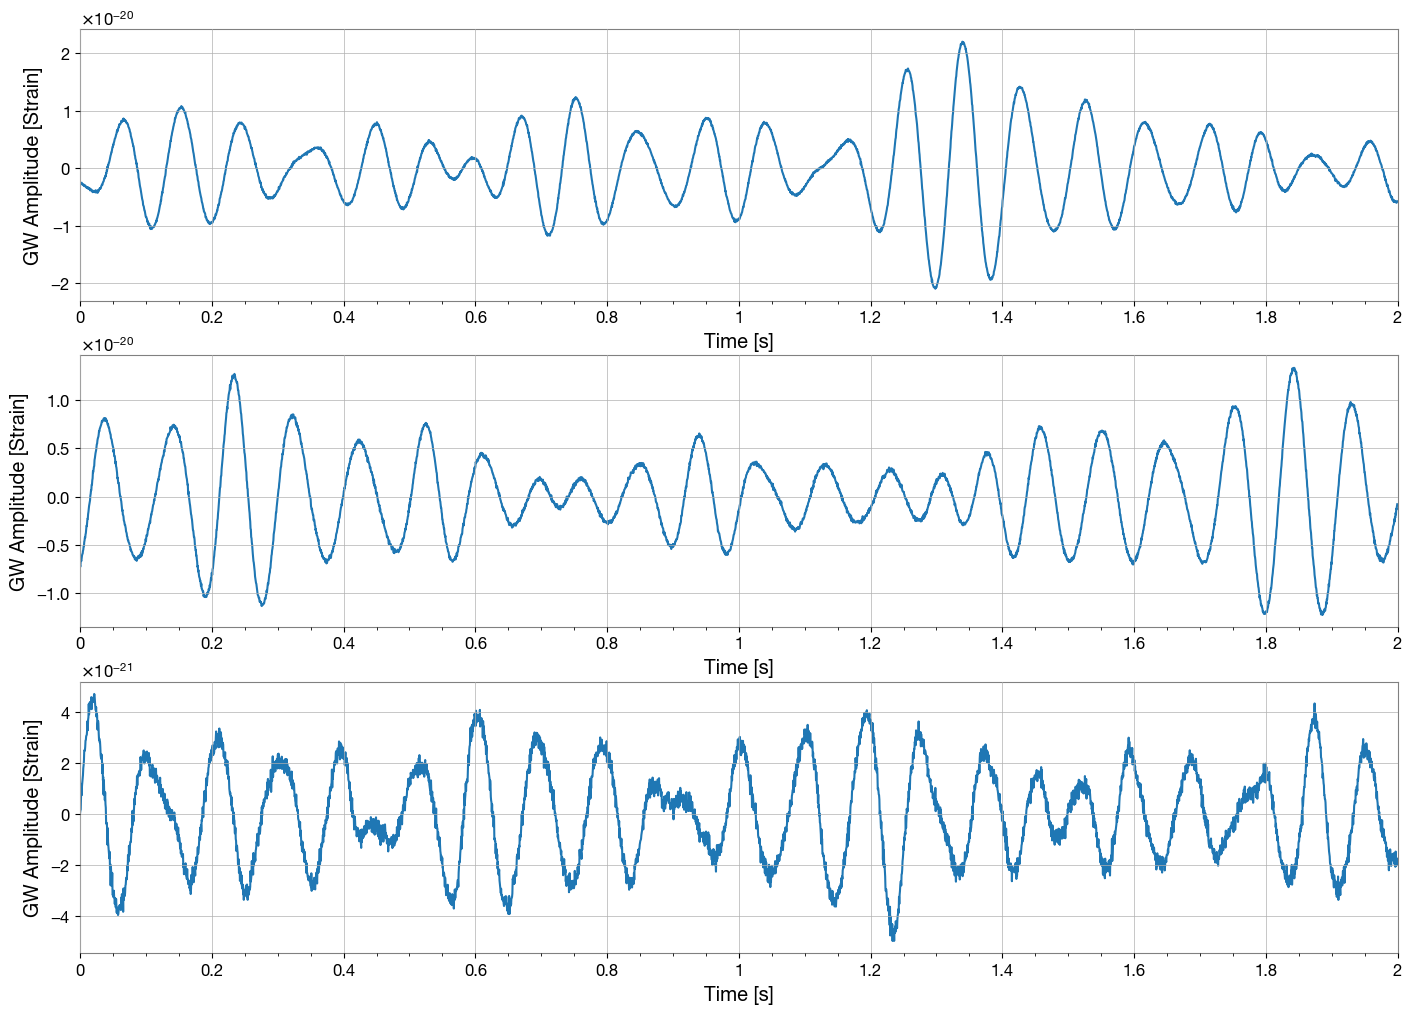

In [13]:
#ploting time Series without a signal
plot_data(ts_no_signal1,  ts_no_signal2,  ts_no_signal3)

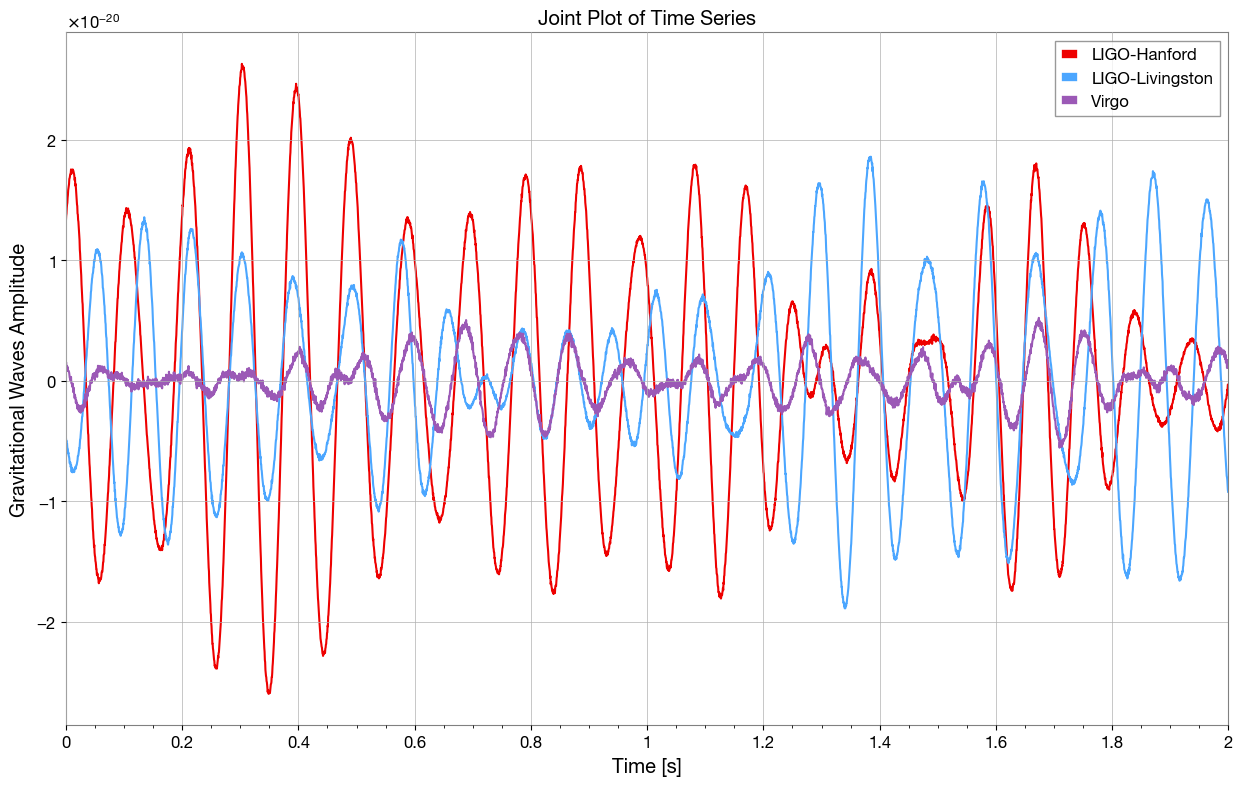

In [14]:
#Joint plot of time series with a signal
plot_data_jointly(ts_signal1,  ts_signal2,  ts_signal3)

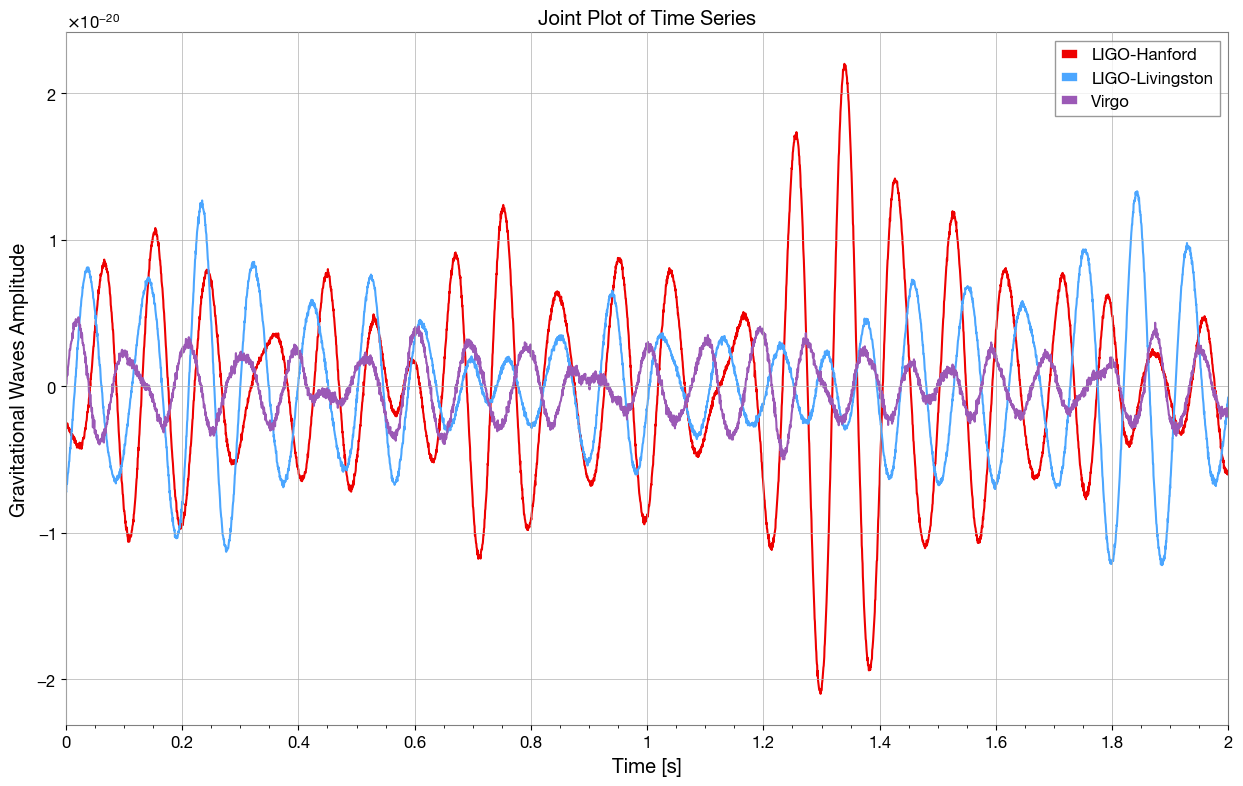

In [15]:
#Joint plot of time series without a signal
plot_data_jointly(ts_no_signal1,  ts_no_signal2,  ts_no_signal3)

[Text(0.5, 1.0, 'Not Whiten')]

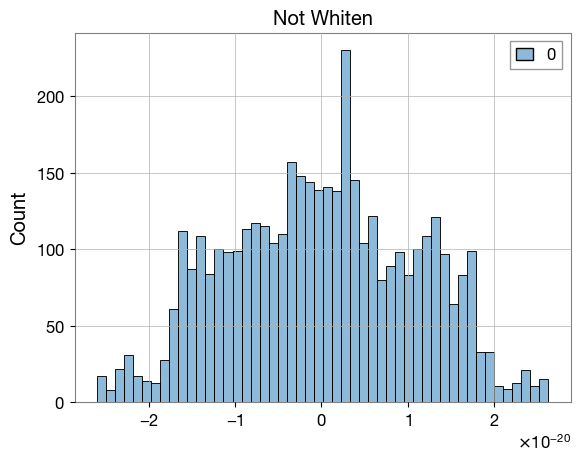

In [16]:
#ploting to check the distribution of the Data
ts_signal1_df = pd.DataFrame(ts_signal1)
sns.histplot(ts_signal1_df, bins =50).set(title ="Not Whiten")

- <font size = 4> We observe there is no visual diffrence, between a timeseris file with or withouth a signal.

- ## Filtering Methods

In [17]:
#Function to whiten the TimeSeries data
def whitenTimeSeries(ts1,ts2,ts3):
    transitionRegion = 0.2
    ts1_whiten = ts1.whiten(2, window=('tukey',transitionRegion))
    ts2_whiten = ts2.whiten(2, window=('tukey',transitionRegion))
    ts3_whiten = ts3.whiten(2, window=('tukey',transitionRegion))
    return ts1_whiten, ts2_whiten, ts3_whiten

In [18]:
#Function to retrun the constant Q transform give GW time-series data
def qTransform(ts):
     return ts.q_transform(qrange=(16,32), frange=(30,400))

In [19]:
#Function To Generate And Plot the Q-Transform of the Data
def qSpectrogramPlot(qspecgram):
    plot = qspecgram.plot(figsize=[20, 15])
    ax = plot.gca()
    ax.set_xscale('seconds')
    ax.set_yscale('log')
    ax.set_ylabel('Frequency [Hz]')
    ax.grid(True, axis='y', which='both')
    ax.colorbar(cmap='viridis', label='Normalized energy')
    plot.show()
   

- ## Whitening

In [20]:
#Storing Whiten Time Series In Variables, and Ploting
ts1_whiten, ts2_whiten, ts3_whiten = whitenTimeSeries(ts_signal1,ts_signal2,ts_signal3)

/Users/Robin1/opt/anaconda3/envs/COMP_542/lib/python3.9/site-packages/gwpy/plot/plot.py:287: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


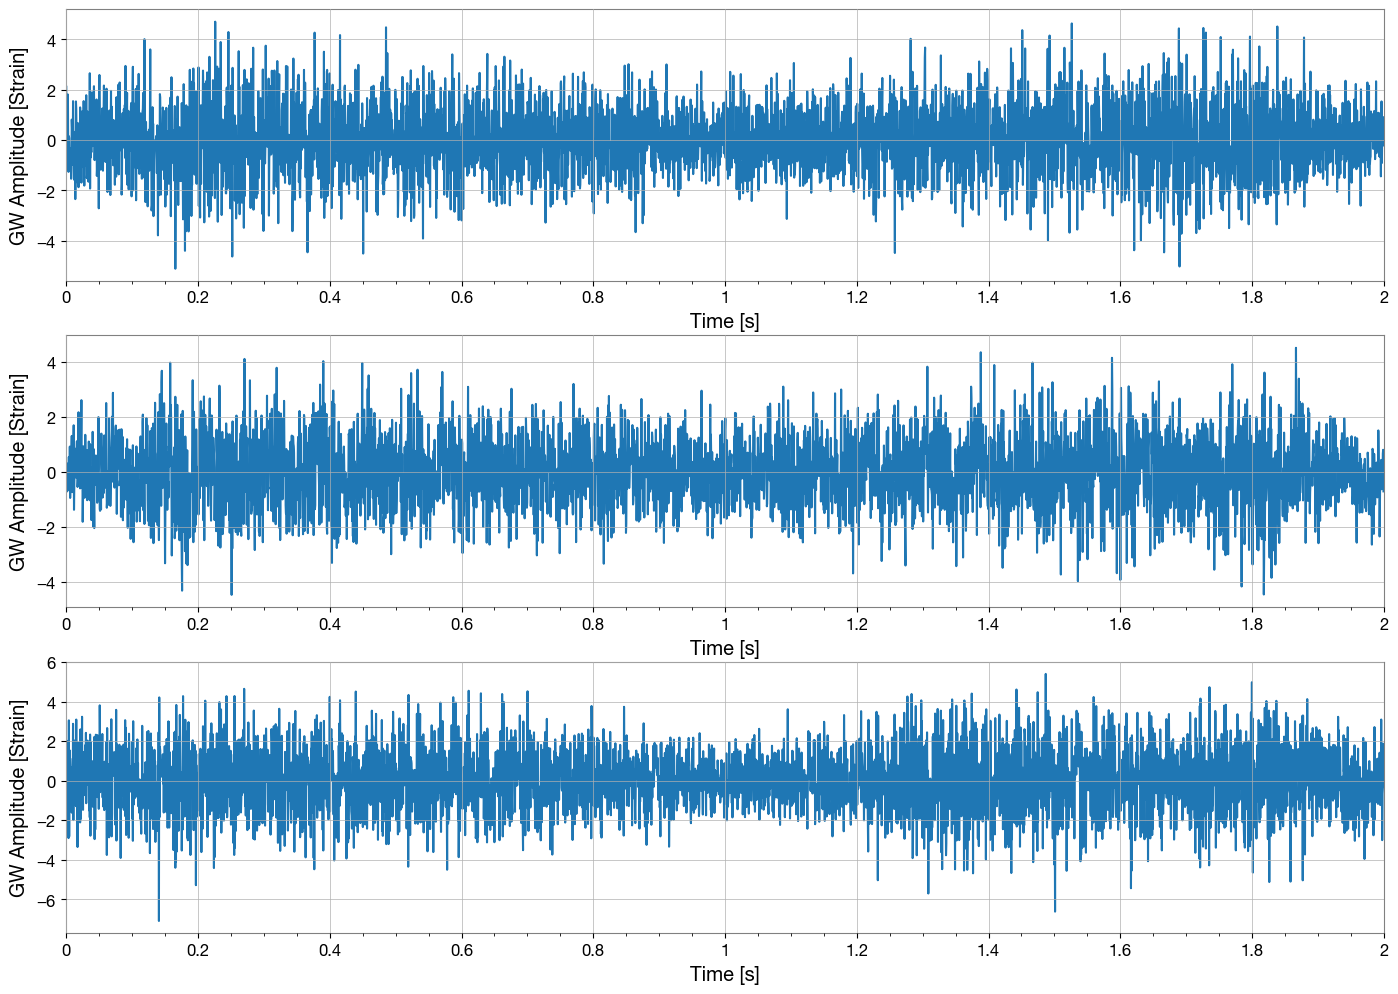

In [21]:
#Ploting the data after a Whiten filter was applied to data with a signal
plot_data(ts1_whiten, ts2_whiten,ts3_whiten)

[Text(0.5, 1.0, 'Time Series Whiten')]

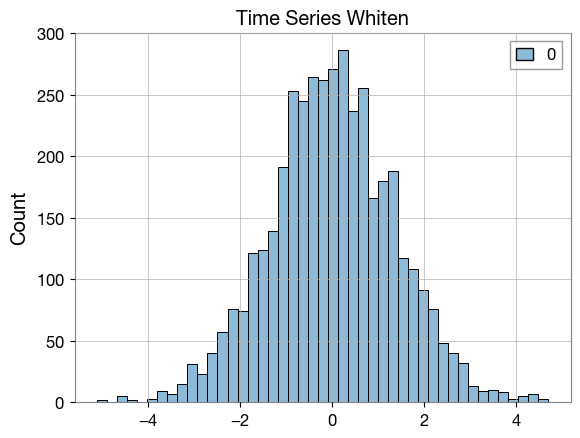

In [22]:
#ploting to check the distribution of the Data
ts1_whiten_df = pd.DataFrame(ts1_whiten)
sns.histplot(ts1_whiten_df).set(title = "Time Series Whiten")

/Users/Robin1/opt/anaconda3/envs/COMP_542/lib/python3.9/site-packages/gwpy/plot/plot.py:287: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


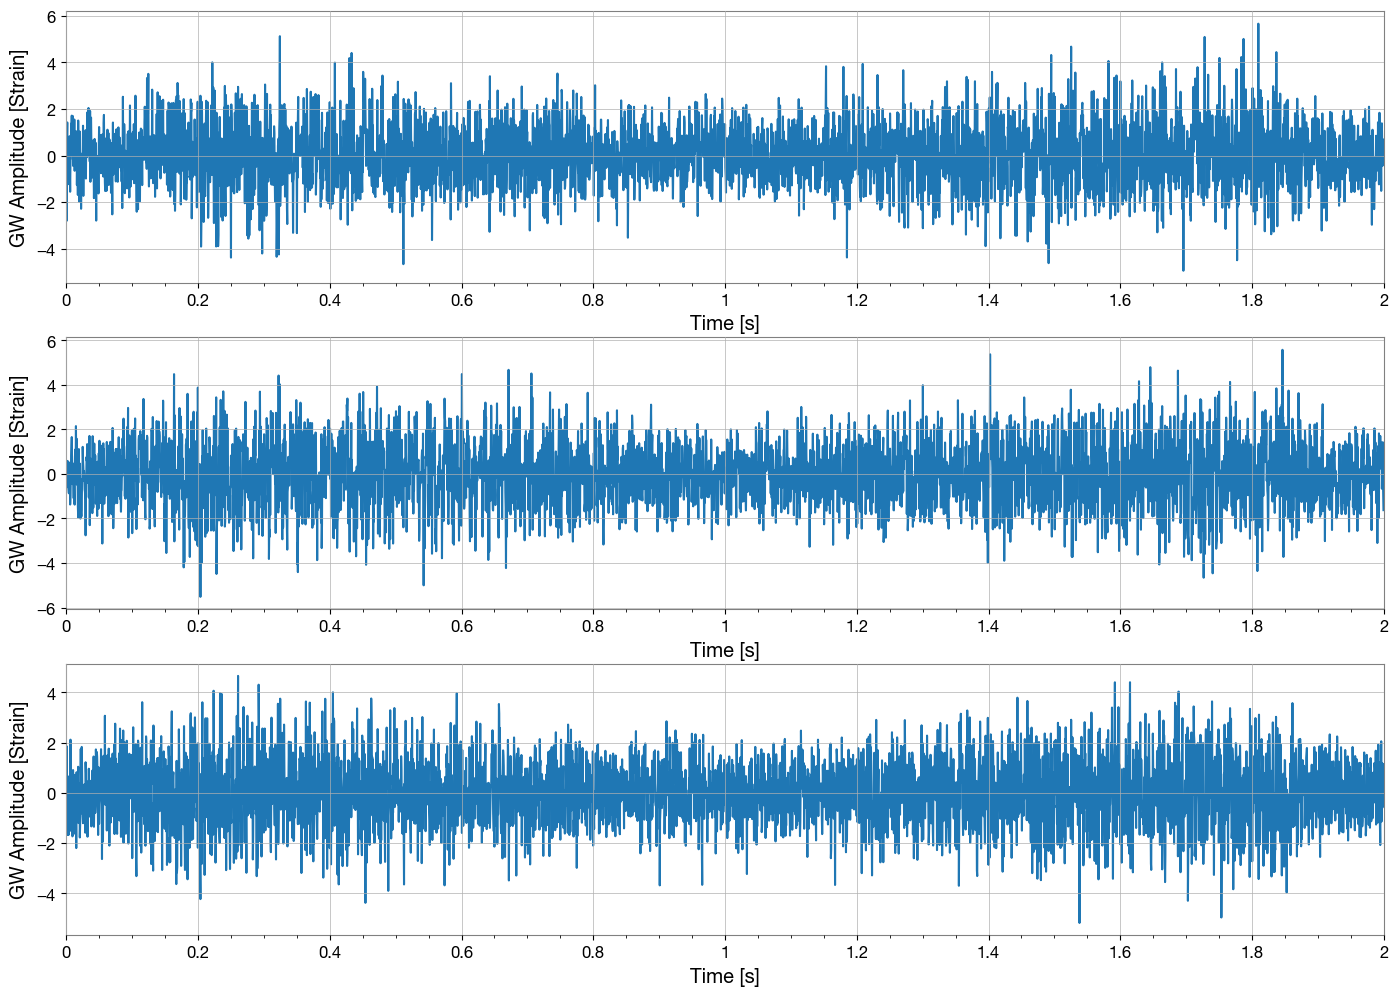

In [23]:
#Storing Whiten Time Series In Variables, and Ploting, for file without signal
ts1_no_whiten, ts2_no_whiten, ts3_no_whiten = whitenTimeSeries(ts_no_signal1,ts_no_signal2,ts_no_signal3)
plot_data(ts1_no_whiten, ts2_no_whiten, ts3_no_whiten)

- ## Q transform

(1000, 740)

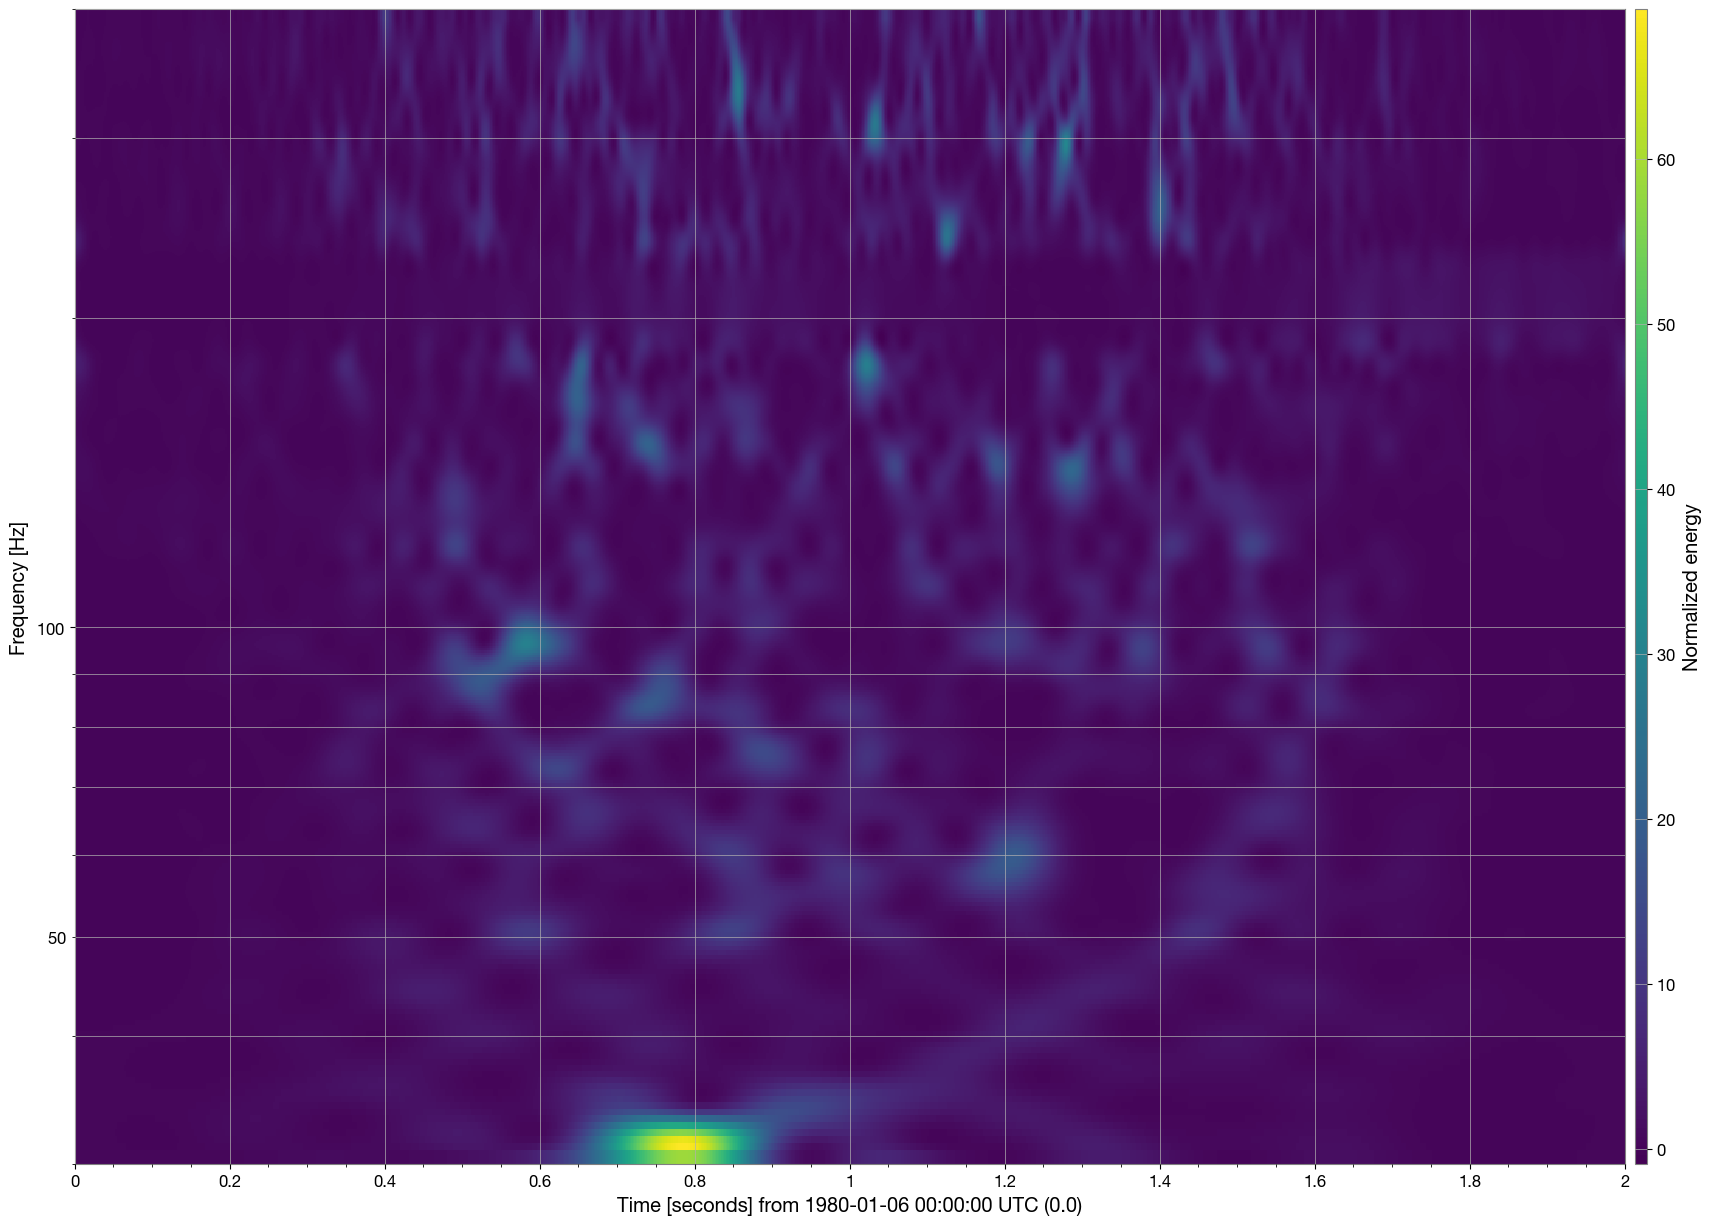

In [30]:
# Q transform Spectrogram Gravitatntional Wave time series without a signal
qspecgram_signal =qTransform(ts1_whiten)
qSpectrogramPlot(qspecgram_signal)
np.shape(qspecgram_signal)

In [25]:
# Applying Filtertin and Generating Q Transform of data withjout a Signal Present
ts1_no_whiten, ts2_no_whiten, ts3_no_whiten = whitenTimeSeries(ts_no_signal1,  ts_no_signal2,  ts_no_signal3)

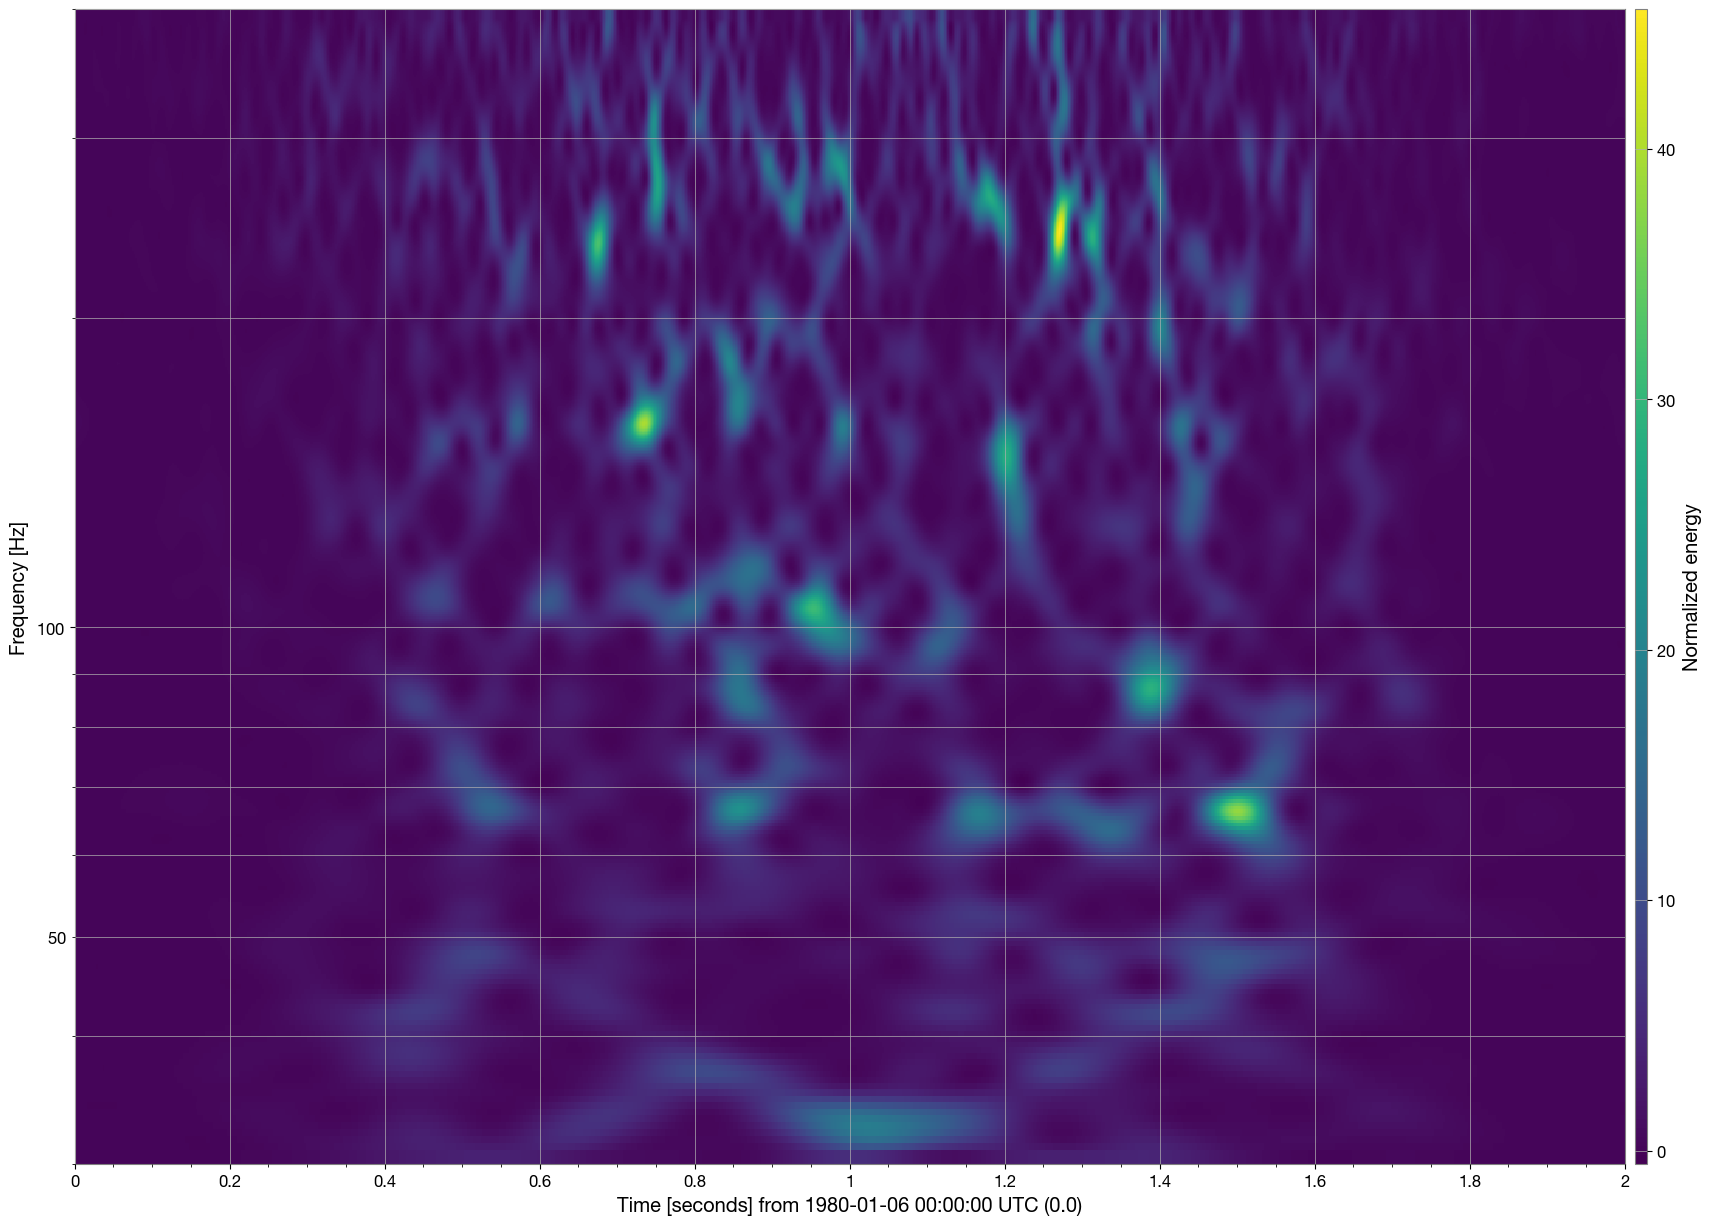

In [26]:
#Ploting Spctogram for Data with no signal
qspecgram_no_signal =qTransform(ts1_no_whiten)
qSpectrogramPlot(qspecgram_no_signal)

- ## Training Label Data Analysis

In [27]:
#Loading training Labels File
training_labels_path = "../data/training_labels.csv"
training_labels = pd.read_csv(training_path)

NameError: name 'training_path' is not defined

In [ ]:
#Calling Training Labels
training_labels

In [ ]:
#Plotning a count plot to chck if training labels are balanced
sns.countplot(data = training_labels,x= "target", hue = "target")

- <font size = 4> We observe that the Training labels data set is balanced 

In [ ]:
#Chacking Training Labels For Null Valulese
training_labels.isnull().sum()

- <font size = 4> We observe that there are no null values in our data set

In [ ]:
#Ploting Data Frame of Sample Data
createTSDataFrame(sample_data_signal)